**Step 1: Load and Preprocess the** **Data**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import numpy as np

**BINARY CLASS CLASSIFICATION-Pima Indians Diabetes dataset**

In [2]:
data = pd.read_csv('/content/diabetes.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.shape

(768, 9)

In [6]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [7]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

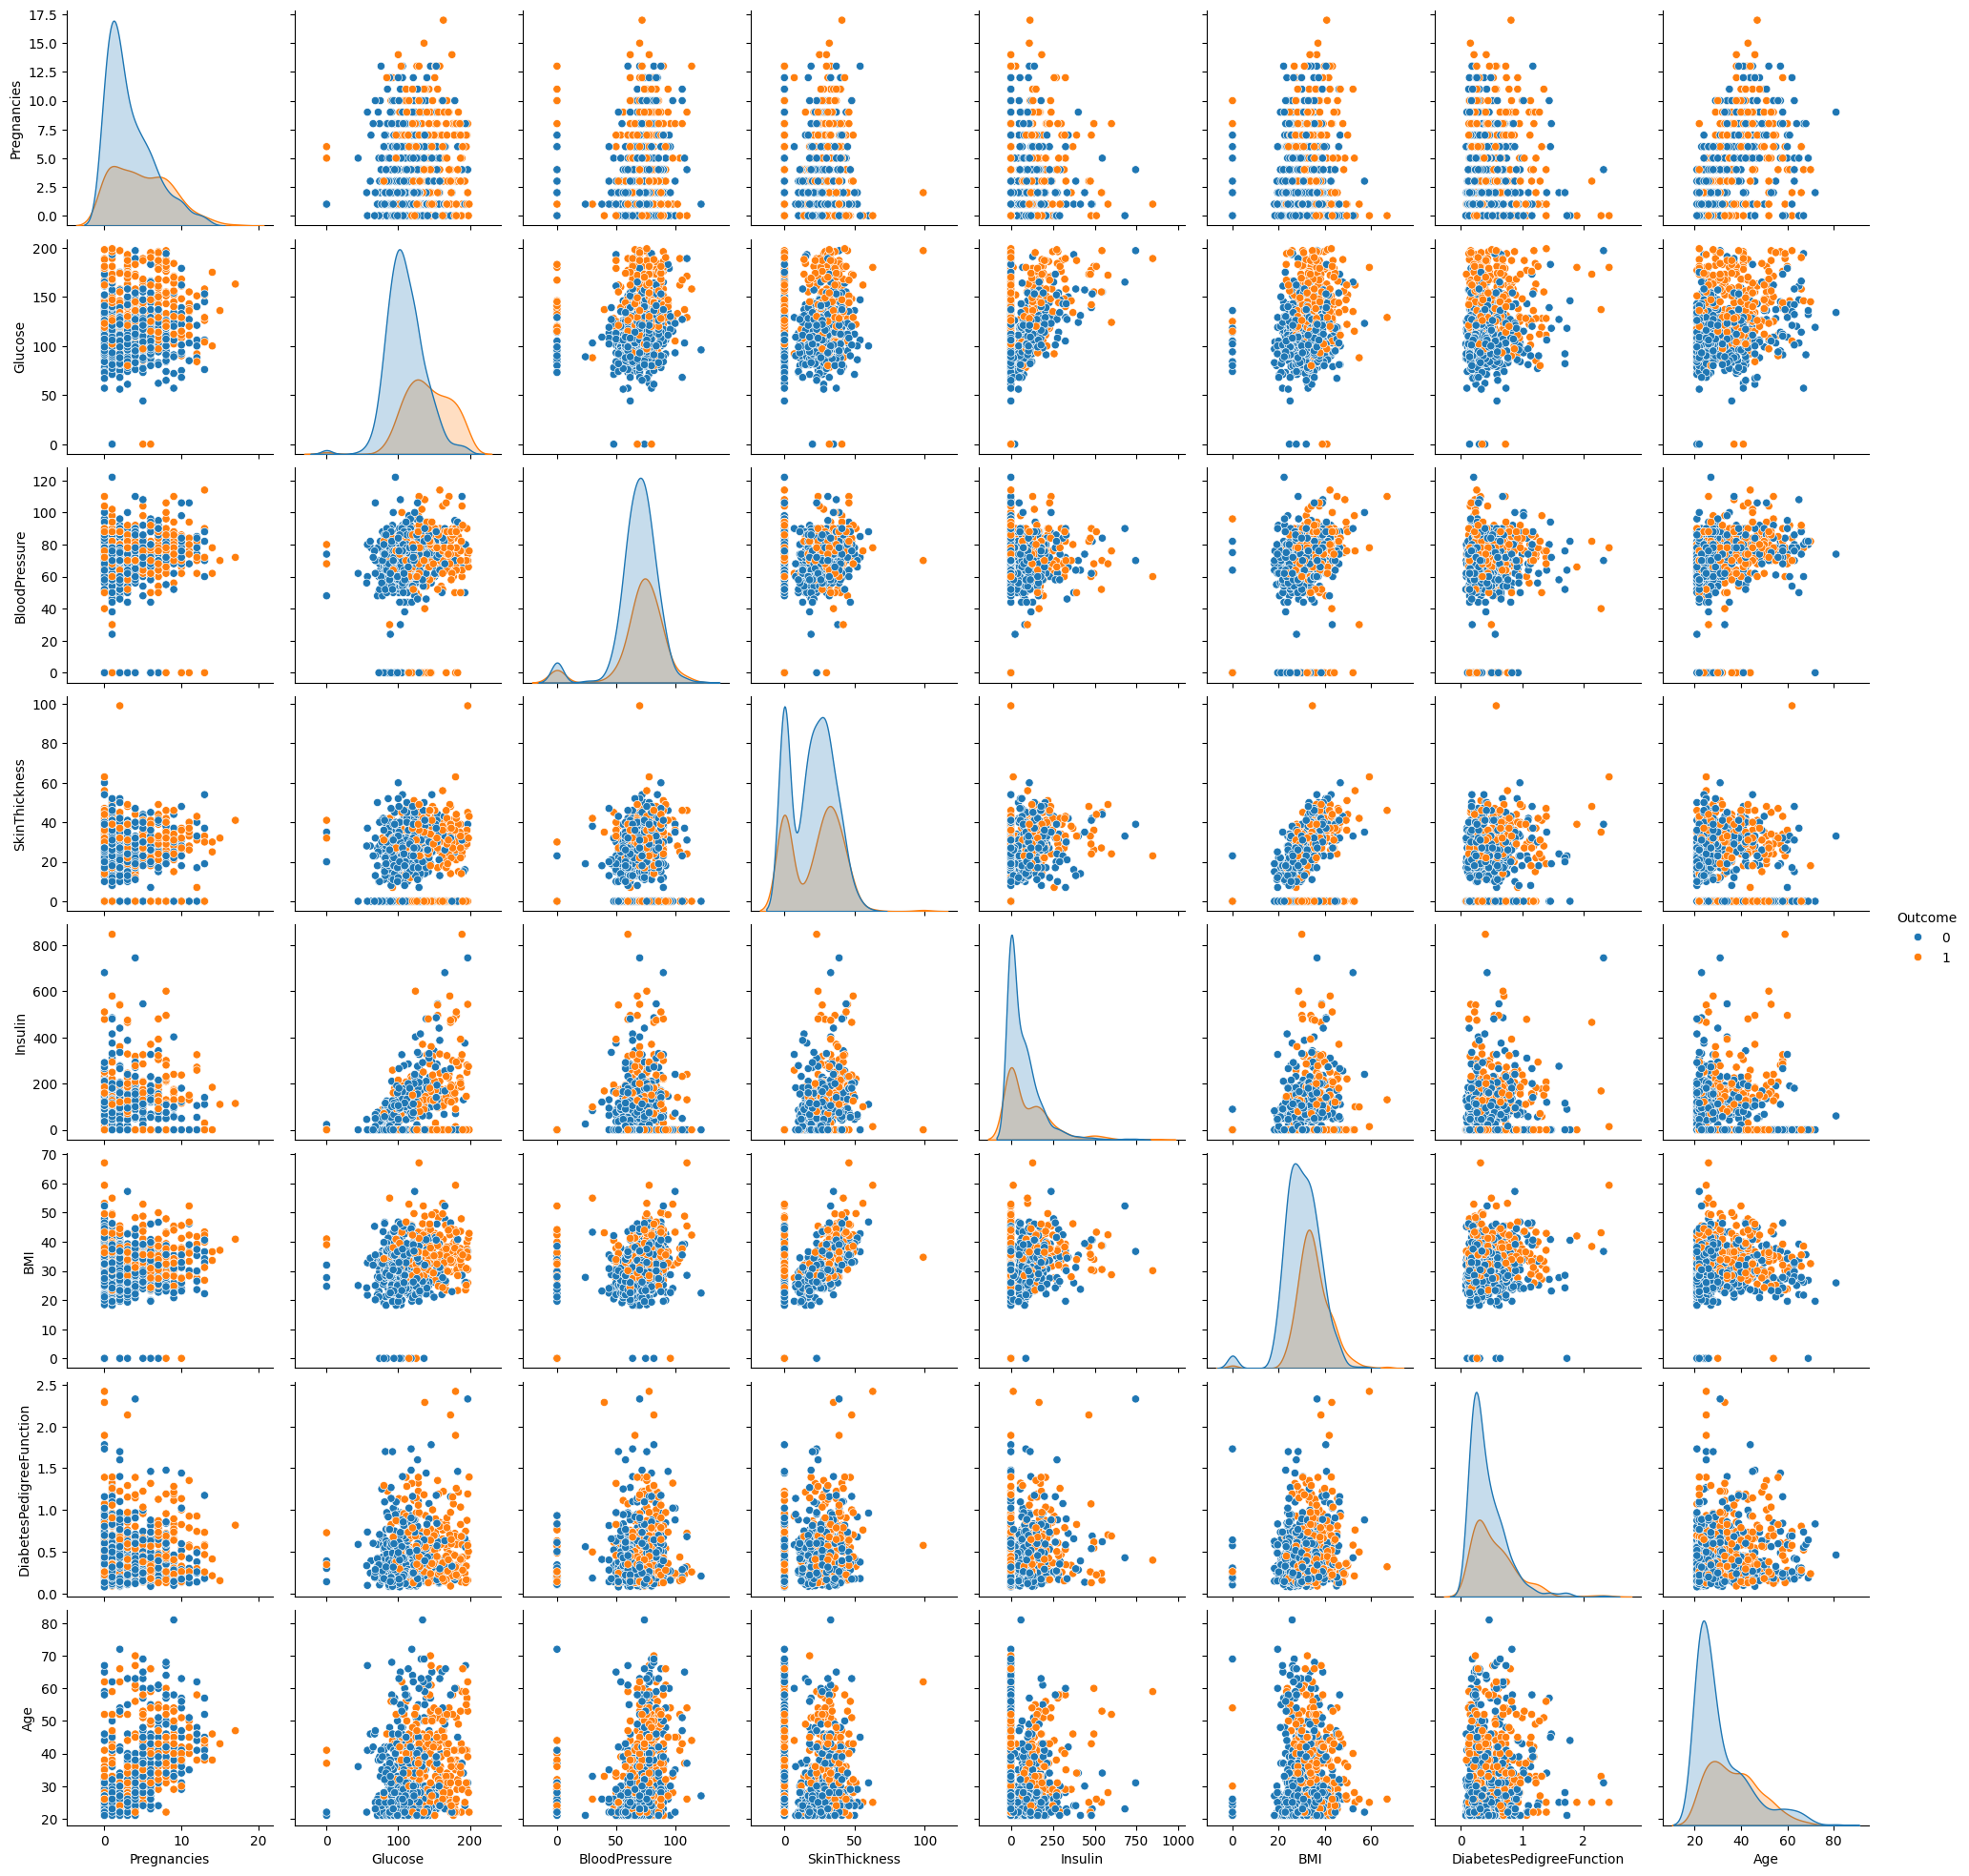

In [8]:
import seaborn as sns

# Pairplot
sns.pairplot(data, hue='Outcome')
plt.show()

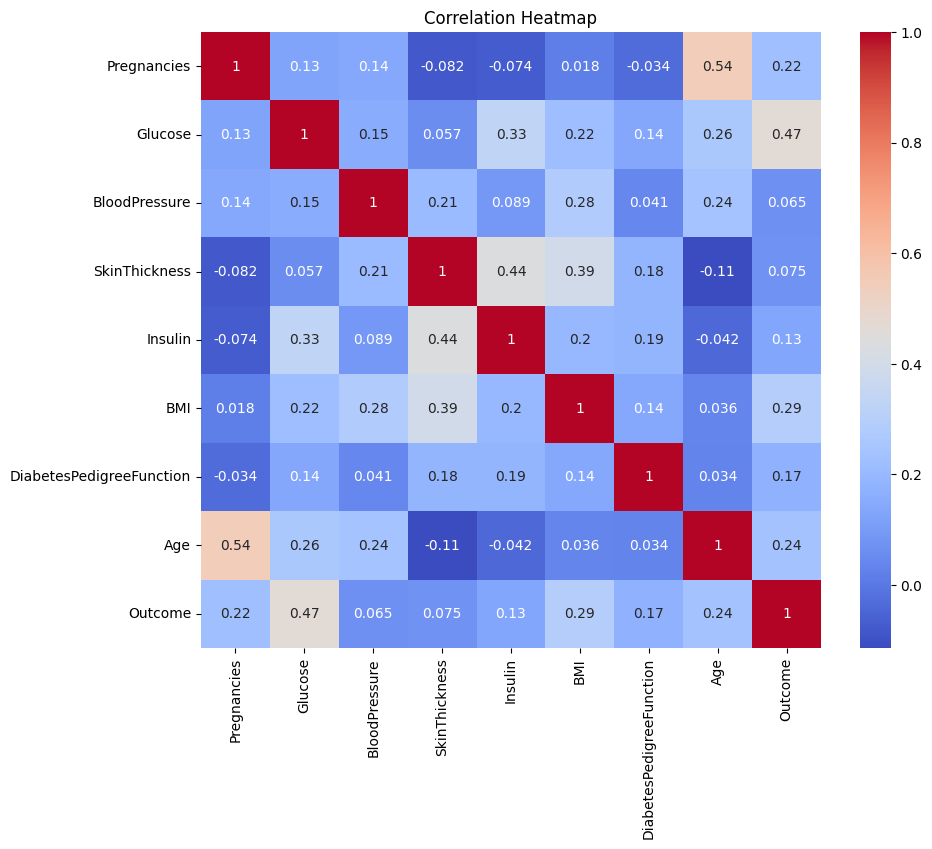

In [9]:
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-11-05d36b0f0b8b>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Outcome'] == 0][col], label='Outcome 0', hist=False)
<ipython-input-11-05d36b0f0b8b>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Outcome'] == 1][col], label='Outcome 1', 

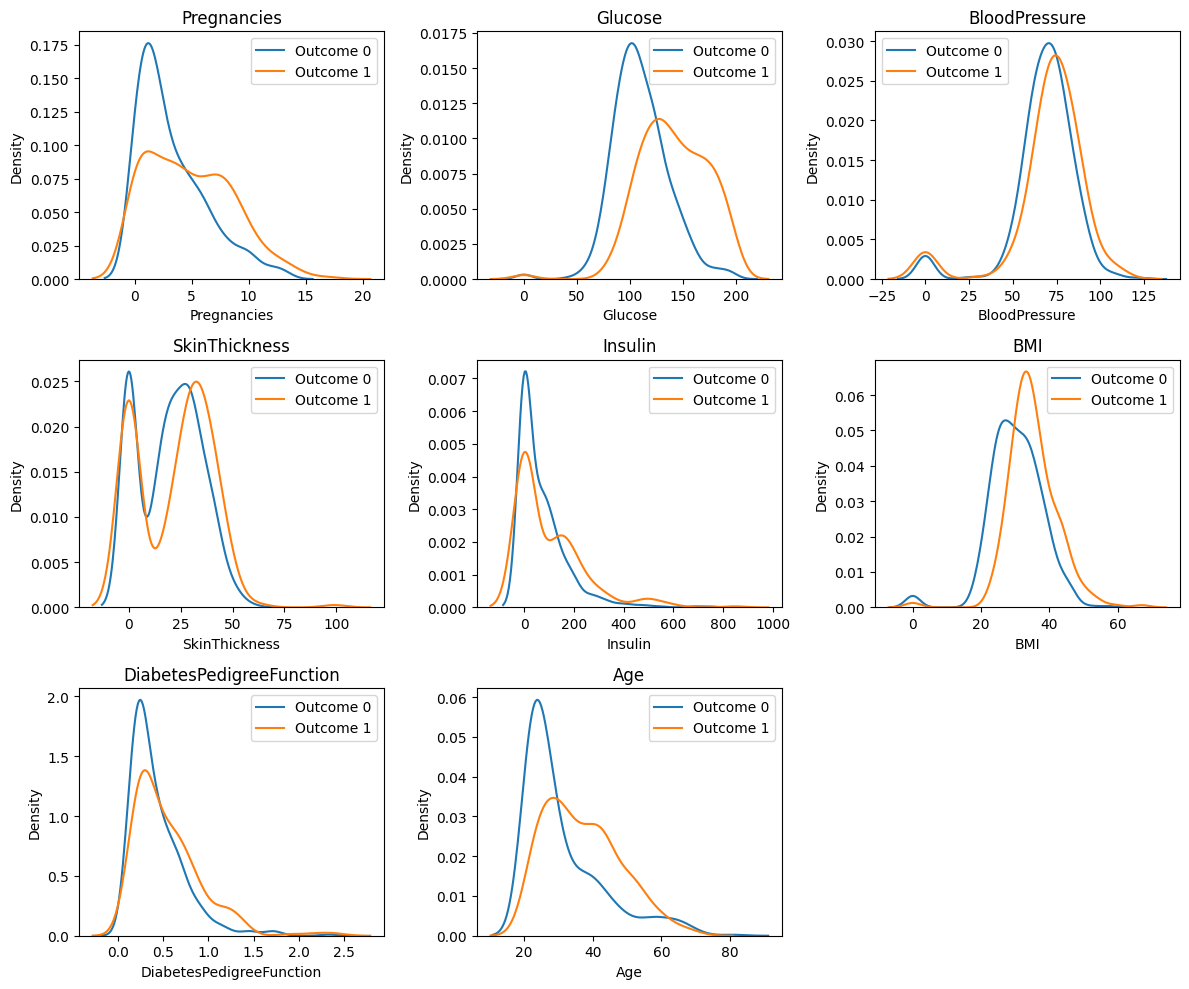

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distplot for each feature
plt.figure(figsize=(12, 10))
for i, col in enumerate(data.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.distplot(data[data['Outcome'] == 0][col], label='Outcome 0', hist=False)
    sns.distplot(data[data['Outcome'] == 1][col], label='Outcome 1', hist=False)
    plt.legend()
    plt.title(col)
plt.tight_layout()
plt.show()

In [12]:
# Split the dataset into features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [15]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**implementation of SVM classifier**

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}


In [17]:
# Initialize the SVM Classifier
svm = SVC()

In [19]:
# Perform grid search to find the best parameters
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']})

In [20]:
# Get the best parameters and model
best_params = grid_search.best_params_
best_svm = grid_search.best_estimator_

In [21]:
# Predict the labels
y_pred = best_svm.predict(X_test_scaled)


In [22]:
# Print the best parameters
print("Best Parameters:", best_params)


Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [23]:
# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[99  8]
 [20 27]]


In [24]:
# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       107
           1       0.77      0.57      0.66        47

    accuracy                           0.82       154
   macro avg       0.80      0.75      0.77       154
weighted avg       0.81      0.82      0.81       154



In [25]:
# Calculate ROC curve and AUC
y_scores = best_svm.decision_function(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)


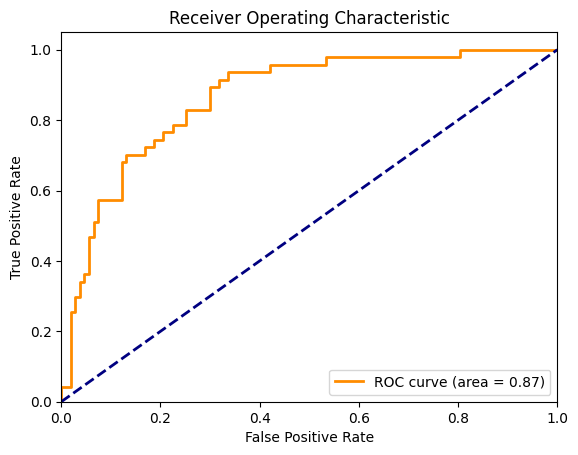

In [26]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize lists to store results
results = []


In [28]:
# Define parameter grids for different kernels
param_grids = [
    {'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
    {'C': [0.1, 1, 10, 100], 'kernel': ['poly'], 'degree': [2, 3, 4]},
    {'C': [0.1, 1, 10, 100], 'kernel': ['rbf'], 'gamma': [1, 0.1, 0.01, 0.001]},
    {'C': [0.1, 1, 10, 100], 'kernel': ['sigmoid'], 'gamma': [1, 0.1, 0.01, 0.001]}
]


In [29]:
# Iterate over different kernels
model_num = 1
for param_grid in param_grids:
    # Initialize the SVM Classifier
    svm = SVC()

In [31]:
# Perform grid search to find the best parameters
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['sigmoid']})

In [32]:
 # Get the best parameters and model
best_params = grid_search.best_params_
best_svm = grid_search.best_estimator_

In [33]:
# Predict the labels
y_pred = best_svm.predict(X_test_scaled)

In [34]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [35]:
# Store results
results.append({
        'Model number': model_num,
        'Kernel name': param_grid['kernel'][0],
        'Chosen parameters': best_params,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    })
model_num += 1

In [36]:
# Create a DataFrame to summarize the results
results_df = pd.DataFrame(results)

In [37]:
# Display the results
print(results_df)

   Model number Kernel name                               Chosen parameters  \
0             1     sigmoid  {'C': 100, 'gamma': 0.01, 'kernel': 'sigmoid'}   

   Accuracy  Precision    Recall  F1-score  
0  0.818182    0.72093  0.659574  0.688889  


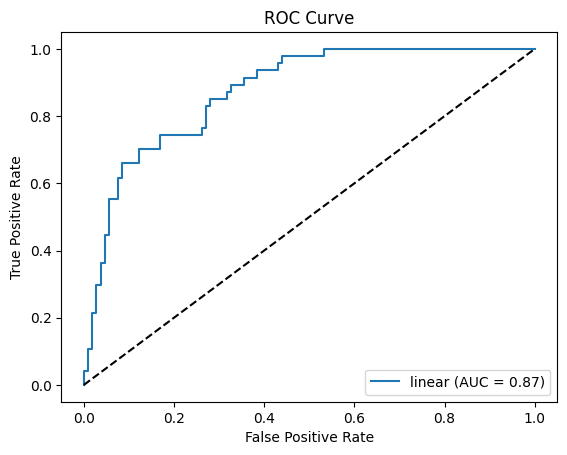

In [41]:
# Plot ROC curves for each model
plt.figure()
for i, param_grid in enumerate(param_grids):
    if i < len(results):  # Check if the index exists in the results list
        svm = SVC(**results[i]['Chosen parameters'])
        svm.fit(X_train_scaled, y_train)
        y_scores = svm.decision_function(X_test_scaled)
        fpr, tpr, _ = roc_curve(y_test, y_scores)
        roc_auc = roc_auc_score(y_test, y_scores)
        plt.plot(fpr, tpr, label=f"{param_grid['kernel'][0]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [42]:
# Show confusion matrix for the best model
best_model_index = results_df['F1-score'].idxmax()
best_model_params = results_df.loc[best_model_index, 'Chosen parameters']
best_svm = SVC(**best_model_params)
best_svm.fit(X_train_scaled, y_train)
y_pred_best = best_svm.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred_best)
print("\nConfusion Matrix for the Best Model:")
print(cm)


Confusion Matrix for the Best Model:
[[95 12]
 [16 31]]


In [43]:
# Plot decision boundary for the best model if feasible (2D data)
if X_train_scaled.shape[1] == 2:
    plt.figure()
    xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
    Z = best_svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.coolwarm)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary for the Best Model')
    plt.show()

In [44]:
# Conclusion
print("\nConclusion:")
print(f"The best kernel for the SVM Classifier is '{results_df.loc[best_model_index, 'Kernel name']}' with the following parameters: {best_model_params}")
print(f"The model achieved an F1-score of {results_df.loc[best_model_index, 'F1-score']:.2f}, which is the highest among all models tested.")


Conclusion:
The best kernel for the SVM Classifier is 'sigmoid' with the following parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'sigmoid'}
The model achieved an F1-score of 0.69, which is the highest among all models tested.


**multi-class classification - Wine Recognition Dataset**

In [45]:
wine=pd.read_csv('/content/Wine.csv')

In [46]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [47]:
wine.describe()

Class     Alcohol  Malic acid         Ash  Alcalinity of ash  \
count  178.000000  178.000000  178.000000  178.000000         178.000000   
mean     1.938202   13.000618    2.336348    2.366517          19.494944   
std      0.775035    0.811827    1.117146    0.274344           3.339564   
min      1.000000   11.030000    0.740000    1.360000          10.600000   
25%      1.000000   12.362500    1.602500    2.210000          17.200000   
50%      2.000000   13.050000    1.865000    2.360000          19.500000   
75%      3.000000   13.677500    3.082500    2.557500          21.500000   
max      3.000000   14.830000    5.800000    3.230000          30.000000   

        Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000    0.340000              0.130000   
25%     88.000000       1.742500    1.205000              0.270000   
50%     98.000000       2.355000    2.135000              0.340000   
75%    107.000000       2.800000    2.875000              0.437500   
max    162.000000       3.880000    5.080000              0.660000   

       Proanthocyanins  Color intensity         Hue  \
count       178.000000       178.000000  178.000000   
mean          1.590899         5.058090    0.957449   
std           0.572359         2.318286    0.228572   
min           0.410000         1.280000    0.480000   
25%           1.250000         3.220000    0.782500   
50%           1.555000         4.690000    0.965000   
75%           1.950000         6.200000    1.120000   
max           3.580000        13.000000    1.710000   

       OD280/OD315 of diluted wines      Proline  
count                    178.000000   178.000000  
mean                       2.611685   746.893258  
std                        0.709990   314.907474  
min                        1.270000   278.000000  
25%                        1.937500   500.500000  
50%                        2.780000   673.500000  
75%                        3.170000   985.000000  
max                        4.000000  1680.000000

In [48]:
wine.columns

Index(['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [49]:
wine.shape

(178, 14)

In [50]:
wine.head()

Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735

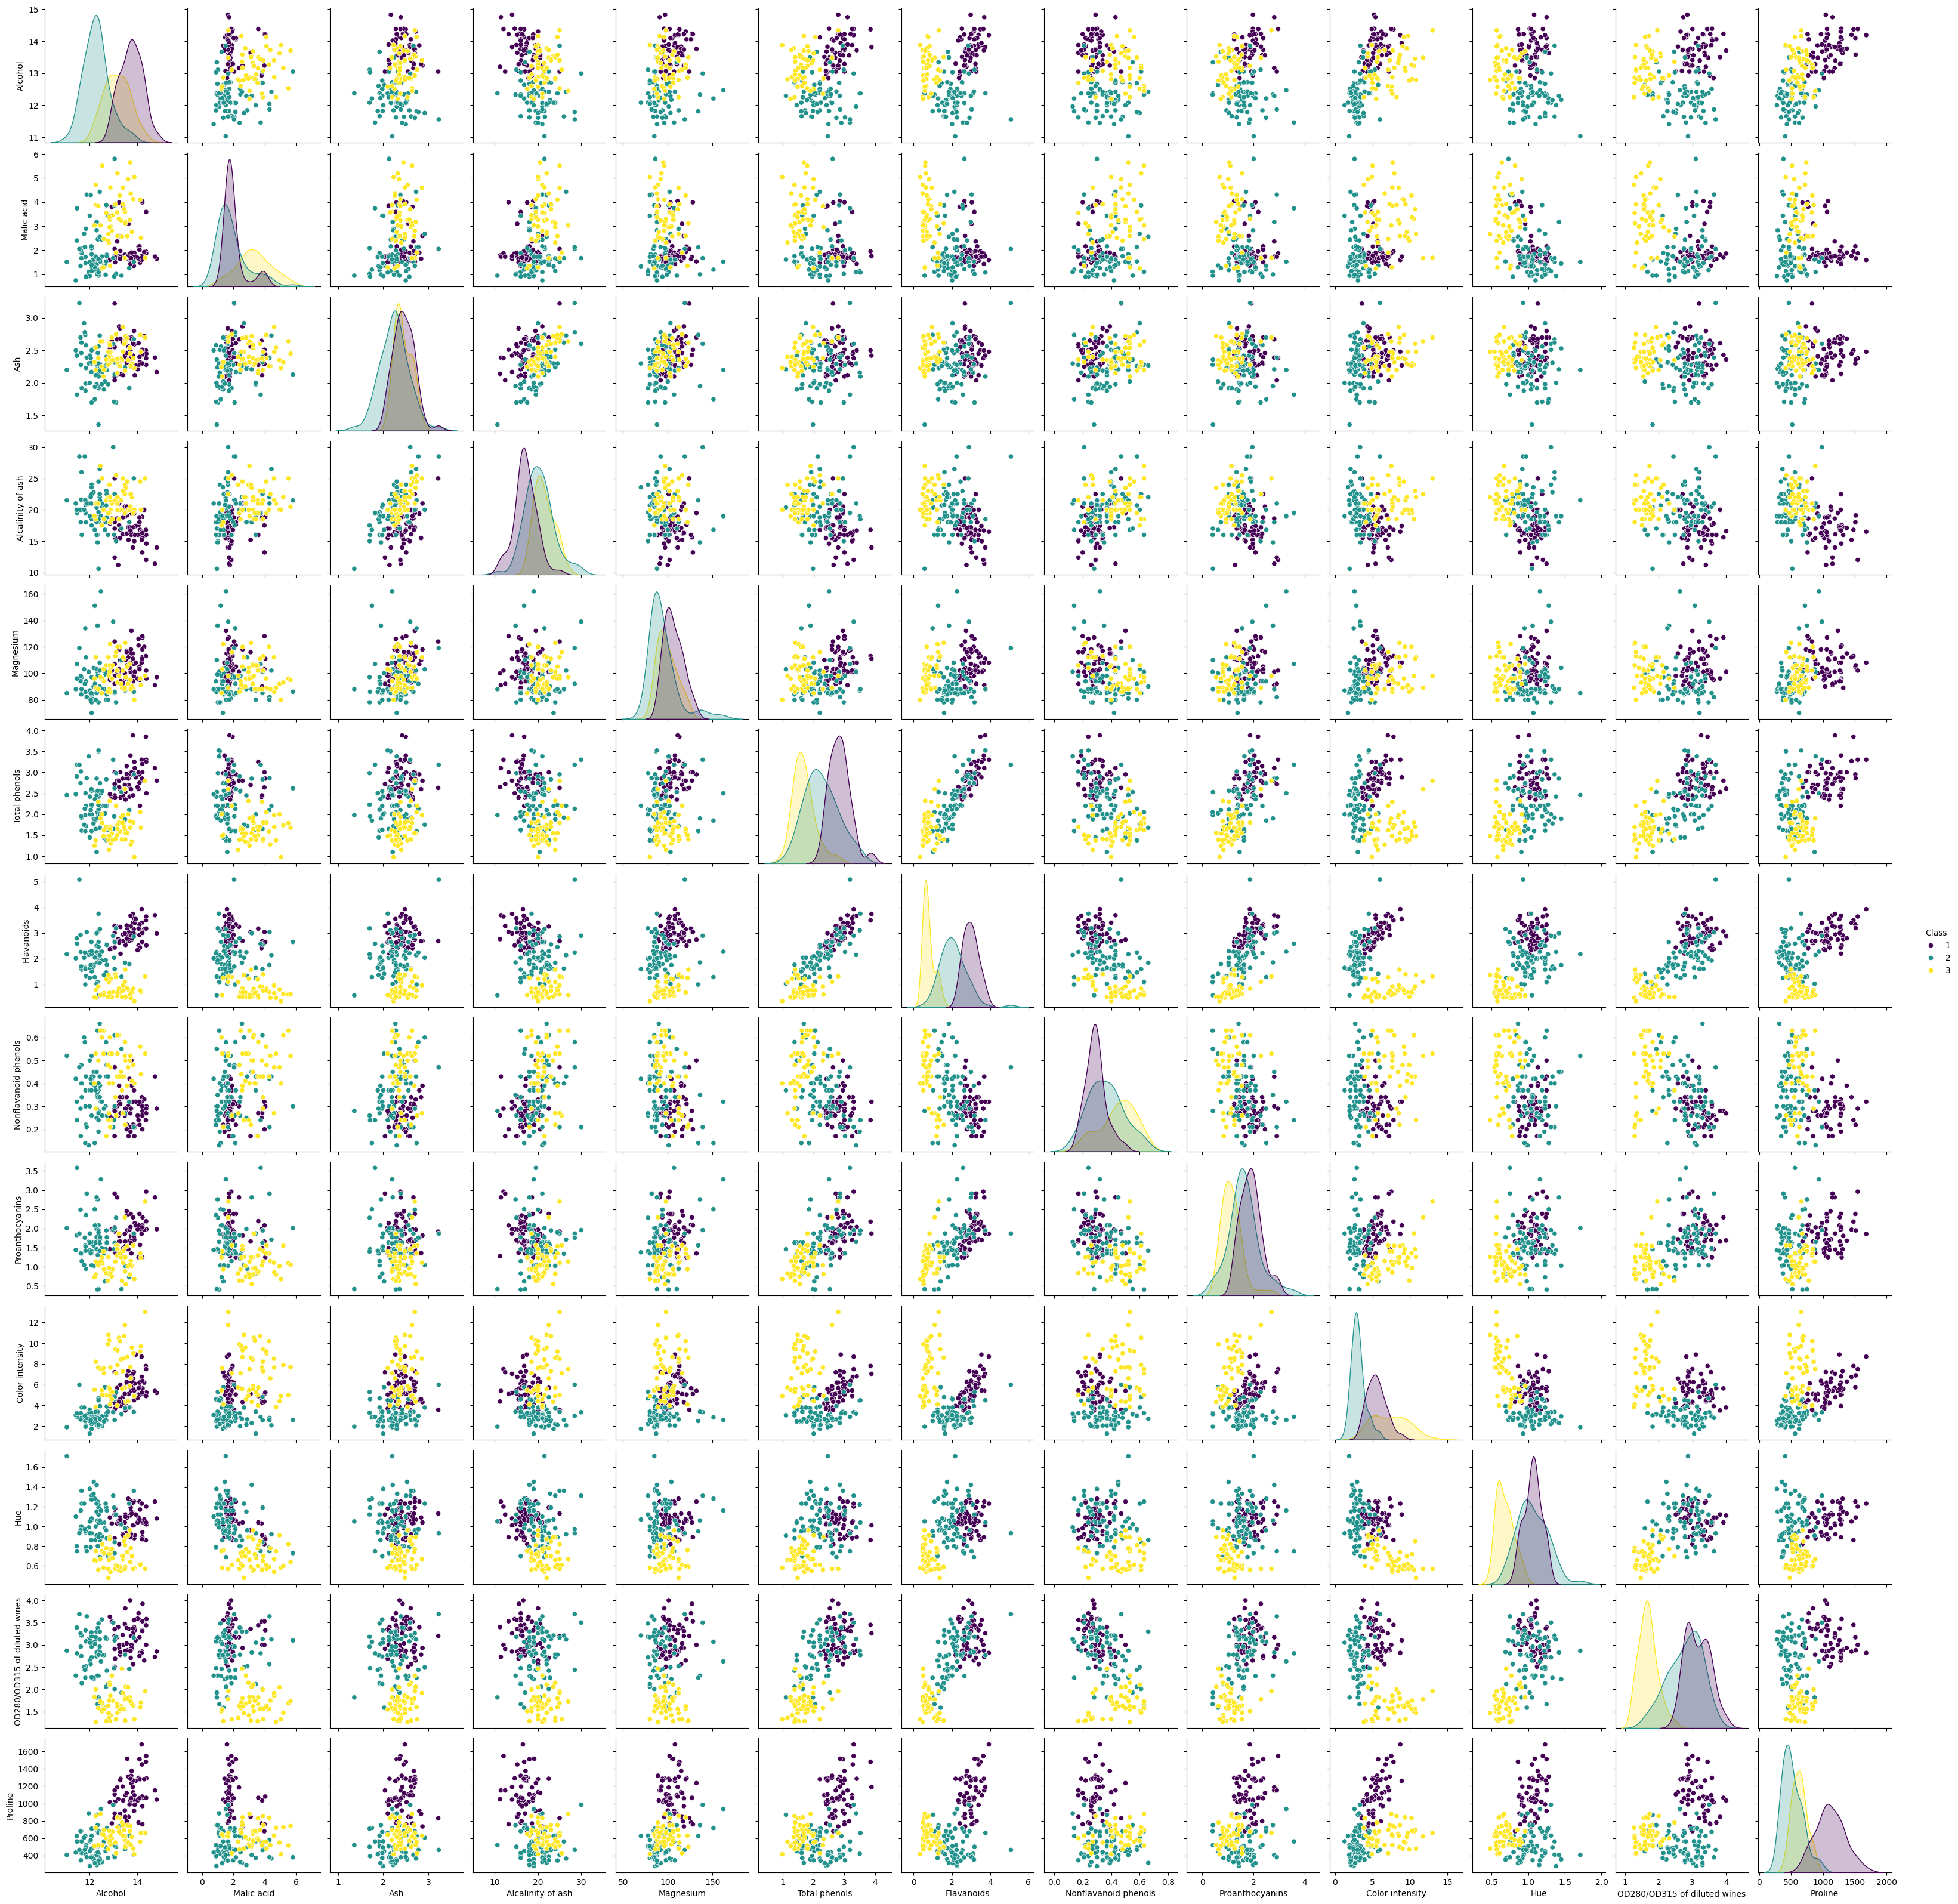

In [57]:
# Plot pairplot
sns.pairplot(wine, hue='Class', palette='viridis')
plt.show()



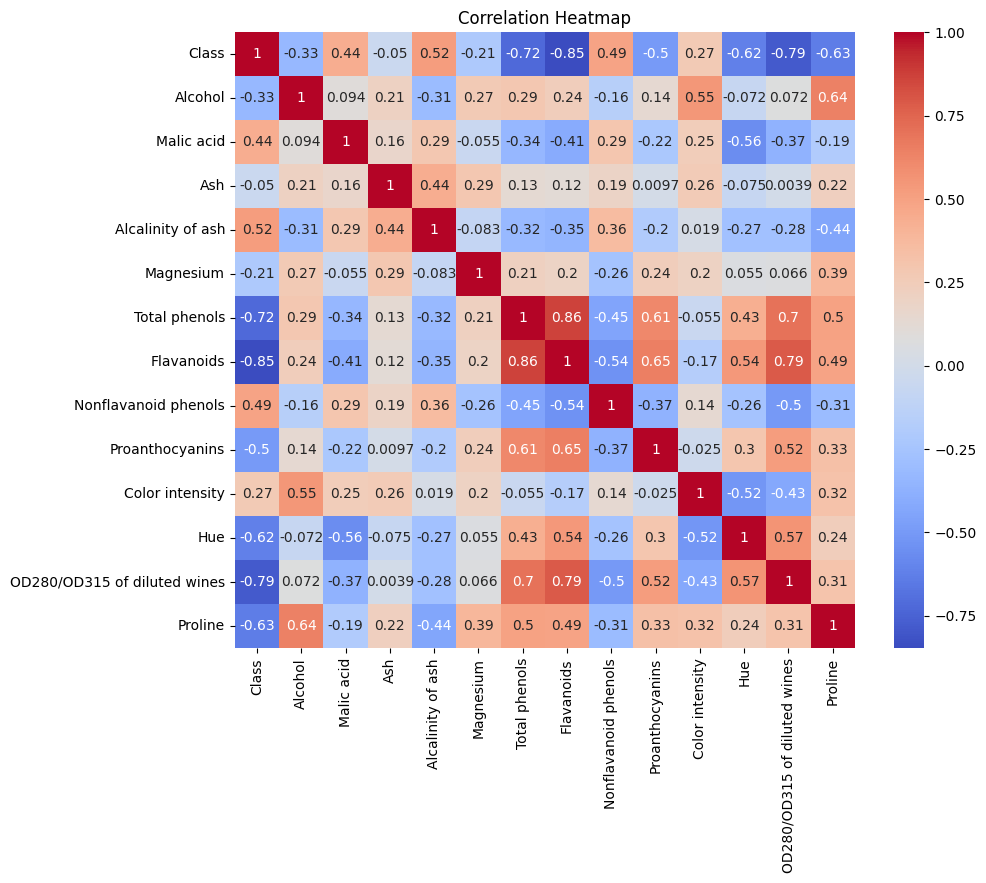

In [58]:
# Calculate the correlation matrix
corr = wine.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


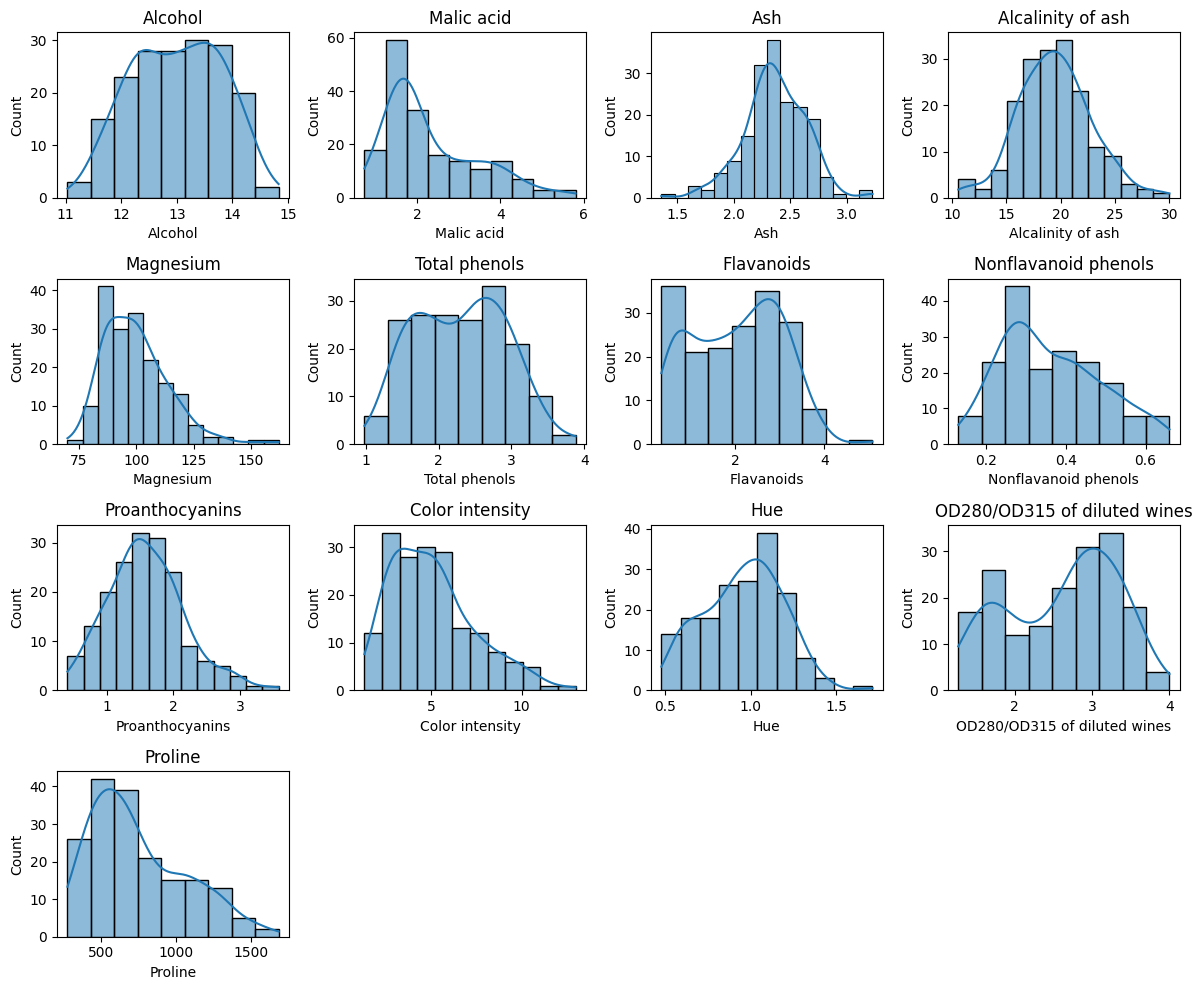

In [59]:
# Plot distplot for each feature
plt.figure(figsize=(12, 10))
for i, col in enumerate(wine.columns[1:]):
    plt.subplot(4, 4, i + 1)
    sns.histplot(wine[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


In [63]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt

# Load the Wine Recognition Dataset
wine = load_wine()
X = wine.data
y = wine.target

In [64]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**SVM Classifier with Grid Search**

In [65]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix


In [66]:
# Define the parameter grid for grid search
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}


In [67]:
# Initialize the SVM Classifier
svm = SVC()

In [68]:
# Perform grid search to find the best parameters
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [69]:
# Get the best parameters and model
best_params = grid_search.best_params_
best_svm = grid_search.best_estimator_

In [70]:
# Predict the labels
y_pred = best_svm.predict(X_test_scaled)


In [71]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [72]:
# Calculate ROC curve and AUC
y_scores = best_svm.decision_function(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test, y_scores, pos_label=2)  # pos_label=2 for multi-class
roc_auc = roc_auc_score(y_test, y_scores, multi_class='ovr')  # 'ovr' for one-vs-rest strategy


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


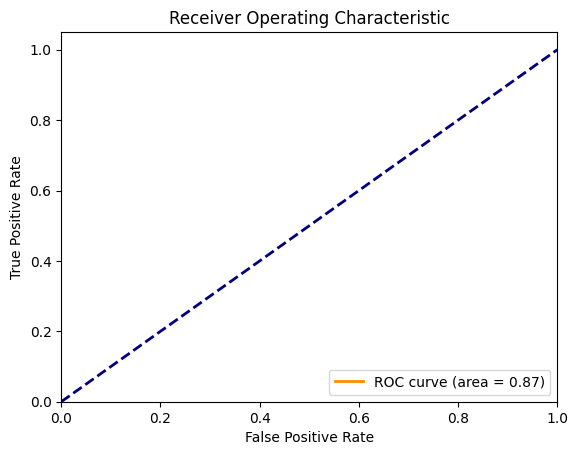

In [73]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [74]:
# Print the best parameters and performance metrics
print("Best Parameters:", best_params)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

Accuracy: 0.8181818181818182
Precision: 0.8134672050638437
Recall: 0.8181818181818182
F1-score: 0.8097050801561917


In [75]:
# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[99  8]
 [20 27]]


In [76]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = [
    {'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
    {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf']},
    {'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4], 'kernel': ['poly']},
    {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['sigmoid']}
]

In [77]:
results = []

for i, param_dict in enumerate(param_grid):
    svm = SVC()
    grid_search = GridSearchCV(svm, param_dict, cv=5)
    grid_search.fit(X_train_scaled, y_train)

    best_params = grid_search.best_params_
    best_svm = grid_search.best_estimator_
    y_pred = best_svm.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append({
        'Model number': i+1,
        'Kernel name': param_dict['kernel'][0],
        'Chosen parameters': best_params,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    })

In [78]:
results_df = pd.DataFrame(results)
print(results_df)

   Model number Kernel name                               Chosen parameters  \
0             1      linear                    {'C': 1, 'kernel': 'linear'}   
1             2         rbf       {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}   
2             3        poly         {'C': 1, 'degree': 3, 'kernel': 'poly'}   
3             4     sigmoid  {'C': 100, 'gamma': 0.01, 'kernel': 'sigmoid'}   

   Accuracy  Precision    Recall  F1-score  
0  0.824675   0.819902  0.824675  0.818931  
1  0.818182   0.813467  0.818182  0.809705  
2  0.753247   0.745630  0.753247  0.719439  
3  0.818182   0.814677  0.818182  0.815809  


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


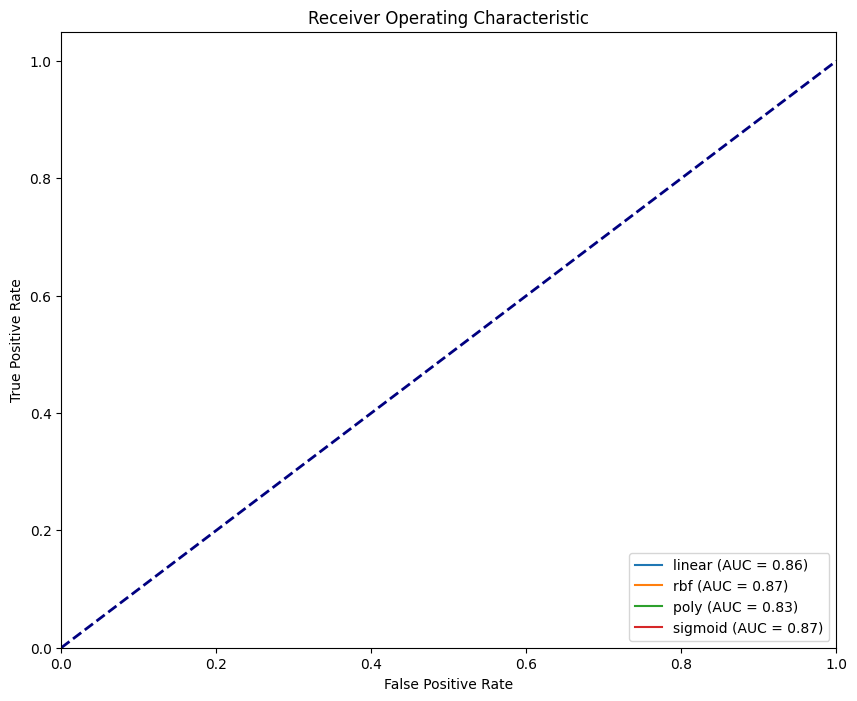

In [79]:
plt.figure(figsize=(10, 8))
for i, param_dict in enumerate(param_grid):
    svm = SVC(**results[i]['Chosen parameters'])
    svm.fit(X_train_scaled, y_train)
    y_scores = svm.decision_function(X_test_scaled)
    fpr, tpr, _ = roc_curve(y_test, y_scores, pos_label=2)  # pos_label=2 for multi-class
    roc_auc = roc_auc_score(y_test, y_scores, multi_class='ovr')  # 'ovr' for one-vs-rest strategy
    plt.plot(fpr, tpr, label=f"{results[i]['Kernel name']} (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [80]:
for i, param_dict in enumerate(param_grid):
    svm = SVC(**results[i]['Chosen parameters'])
    svm.fit(X_train_scaled, y_train)
    y_pred = svm.predict(X_test_scaled)
    print(f"\nConfusion Matrix for Model {i+1} ({results[i]['Kernel name']} Kernel):")
    print(confusion_matrix(y_test, y_pred))


Confusion Matrix for Model 1 (linear Kernel):
[[98  9]
 [18 29]]

Confusion Matrix for Model 2 (rbf Kernel):
[[99  8]
 [20 27]]

Confusion Matrix for Model 3 (poly Kernel):
[[101   6]
 [ 32  15]]

Confusion Matrix for Model 4 (sigmoid Kernel):
[[95 12]
 [16 31]]


In [81]:
# Define the parameter grid for grid search
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

# Initialize an empty list to store results
results = []


In [87]:
# Initialize an empty list to store results
results = []
for i, params in enumerate(param_grid):
    print(params)


# Loop through each parameter combination
#for i, params in enumerate(param_grid):
    # Initialize the SVM classifier
    #svm = SVC(**params)

    # Fit the model
    svm.fit(X_train_scaled, y_train)

    # Predict the labels
    y_pred = svm.predict(X_test_scaled)

C
gamma
kernel


In [89]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [90]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [91]:
# Initialize the SVM Classifier
svm = SVC()

In [92]:
# Perform grid search to find the best parameters
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [94]:
# Predict the labels
# Scale the test features using the same scaler as the training features
X_test_scaled = scaler.transform(X_test)



In [96]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the model
svm.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm.predict(X_test_scaled)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')



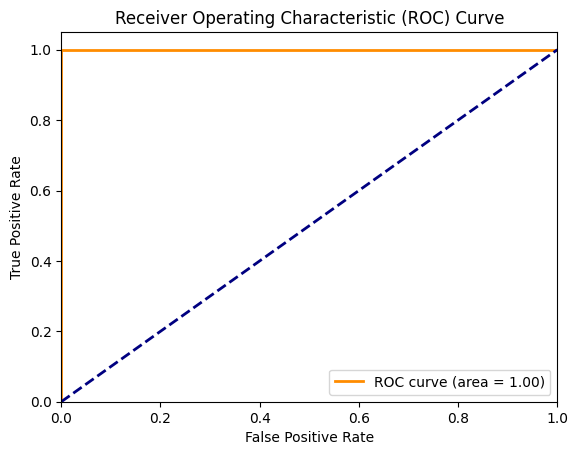

In [102]:
from sklearn.preprocessing import LabelBinarizer

# Convert y_test to a 1D array of binary labels for class 2
lb = LabelBinarizer()
y_test_binary = lb.fit_transform(y_test)

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test_binary[:, 2], y_scores[:, 2])  # Use the binary labels for class 2
roc_auc = roc_auc_score(y_test_binary, y_scores, average='macro')

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [106]:
param_grid = [{'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
              {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf']},
              {'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4], 'kernel': ['poly']},
              {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['sigmoid']}]

results = []

for i, param_dict in enumerate(param_grid):
    svm = SVC()
    grid_search = GridSearchCV(svm, param_dict, cv=5)
    grid_search.fit(X_train_scaled, y_train)

    best_params = grid_search.best_params_
    best_svm = grid_search.best_estimator_
    y_pred = best_svm.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append({
        'Model number': i+1,
        'Kernel name': param_dict['kernel'][0],
        'Chosen parameters': best_params,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    })


In [107]:
results_df = pd.DataFrame(results)
print(results_df)


   Model number Kernel name                             Chosen parameters  \
0             1      linear                {'C': 0.1, 'kernel': 'linear'}   
1             2         rbf      {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}   
2             3        poly     {'C': 100, 'degree': 3, 'kernel': 'poly'}   
3             4     sigmoid  {'C': 1, 'gamma': 0.01, 'kernel': 'sigmoid'}   

   Accuracy  Precision    Recall  F1-score  
0  1.000000   1.000000  1.000000  1.000000  
1  1.000000   1.000000  1.000000  1.000000  
2  0.972222   0.974074  0.972222  0.972253  
3  1.000000   1.000000  1.000000  1.000000  


In [111]:
for i, param_dict in enumerate(param_grid):
    svm = SVC(**results[i]['Chosen parameters'])
    svm.fit(X_train_scaled, y_train)
    y_pred = svm.predict(X_test_scaled)
    print(f"\nConfusion Matrix for Model {i+1} ({results[i]['Kernel name']} Kernel):")
    print(confusion_matrix(y_test, y_pred))




Confusion Matrix for Model 1 (linear Kernel):
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]

Confusion Matrix for Model 2 (rbf Kernel):
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]

Confusion Matrix for Model 3 (poly Kernel):
[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]

Confusion Matrix for Model 4 (sigmoid Kernel):
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


Based on the results, the best kernel can be chosen based on the highest accuracy or other performance metrics. For instance, if the linear kernel provides the highest accuracy, it might be chosen as the best kernel for this dataset. The ROC and AUC curves can also provide insights into the performance of different kernels.




